In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import qutip as qt
import scipy as sp
from scipy import linalg
import matplotlib
import matplotlib.pylab as plt
import krotov
import os.path
import random
from matplotlib import rc
from cycler import cycler
import time
import pandas as pd
from datetime import date
from Ps_library_temp import *
from Hamiltonian_library import *
from config import *
rc('font',**{'family':'serif','serif':['Computer Modern'], 'size':25})
rc('text', usetex=True)

# Spontaneous emission without a laser

In [11]:
system = Ps_system(N_atoms =1,N_points = 100)
rabi0 = 0#2*np.pi*(240e-3)
chirp = 0#2*np.pi*(20e-3)
detuning = 0#2*np.pi*(250e-3)
direction = 1
pulse_duration = 10
system.flag_SE_simple = True

laser_guess = {"label":"laser",
               "order":0,
               "scale":1000,
               "rabi0" : rabi0,
                "detuning0": detuning,
                "chirp" : chirp,
                "pulse_duration" : pulse_duration,
                "unit_wavevector":direction,
                "start":0,
                "end":int(3*pulse_duration)}

#system.init_distribution_singular()
system.init_distribution_flattop()
#system.init_MBdistribution()
system.init_states_excited()

laser = laser_new(laser_guess)
system.create_composite()
system.set_Hamiltonian_MT_general_laser(laser)
result = qt.mesolve(system.H,tlist=laser.tlist,rho0 = system.states,e_ops = system.e_ops,c_ops=system.c_ops,progress_bar=True)
 

10.8%. Run time:   3.63s. Est. time left: 00:00:00:29
21.6%. Run time:   6.67s. Est. time left: 00:00:00:24
32.4%. Run time:   8.89s. Est. time left: 00:00:00:18
40.5%. Run time:  10.49s. Est. time left: 00:00:00:15
51.4%. Run time:  12.36s. Est. time left: 00:00:00:11
62.2%. Run time:  14.40s. Est. time left: 00:00:00:08
70.3%. Run time:  16.09s. Est. time left: 00:00:00:06
81.1%. Run time:  17.95s. Est. time left: 00:00:00:04
91.9%. Run time:  20.06s. Est. time left: 00:00:00:01
Total run time:  21.38s


In [26]:
fig,ax = plt.subplots()
ax.plot(system.velocity_bins,np.asarray(result.expect)[0:system.N_points,-1],alpha=0.8,label="1S")
ax.plot(system.velocity_bins,np.asarray(result.expect)[system.N_points:system.N_points*2,-1],alpha=0.8,label="2P")
ax.plot(system.velocity_bins,np.asarray(result.expect)[system.N_points:system.N_points*2,0]+np.asarray(result.expect)[0:system.N_points,0],alpha=0.8,label="initial",ls="dashed",color="black")
plt.xlabel("velocity [cm/ps]")
plt.ylabel("population")
#plt.vlines(0,0,0.005,ls="dashed",color="black")
plt.grid()
plt.legend(fontsize=15)
#plt.title("")
plt.ylim(0,0.006)
#plt.savefig("figures/thesis_draft/nolaser_SE.svg",bbox_inches="tight")
plt.show()

# Simple SE

In [51]:
system = Ps_system(N_atoms =1,N_points = 100)
rabi0 = 2*np.pi*(120e-3)
chirp = 0#2*np.pi*(20e-3)
detuning = 0#2*np.pi*(250e-3)
direction = 1
pulse_duration = 10
system.flag_SE_simple = True

laser_guess = {"label":"laser",
               "order":0,
               "scale":1000,
               "rabi0" : rabi0,
                "detuning0": detuning,
                "chirp" : chirp,
                "pulse_duration" : pulse_duration,
                "unit_wavevector":direction,
                "start":0,
                "end":int(3*pulse_duration)}

#system.init_distribution_singular()
system.init_distribution_flattop()
#system.init_MBdistribution()
system.init_states_excited()

laser = laser_new(laser_guess)
system.create_composite()
#system.set_Hamiltonian_MT_general_laser(laser)
system.set_Hamiltonian_noCMT_general_laser(laser)
result = qt.mesolve(system.H,tlist=laser.tlist,rho0 = system.states,e_ops = system.e_ops,c_ops=system.c_ops,progress_bar=True)

10.8%. Run time:   2.29s. Est. time left: 00:00:00:18
21.6%. Run time:   4.36s. Est. time left: 00:00:00:15
32.4%. Run time:   7.42s. Est. time left: 00:00:00:15
40.5%. Run time:   9.66s. Est. time left: 00:00:00:14
51.4%. Run time:  12.73s. Est. time left: 00:00:00:12
62.2%. Run time:  15.39s. Est. time left: 00:00:00:09
70.3%. Run time:  17.72s. Est. time left: 00:00:00:07
81.1%. Run time:  20.07s. Est. time left: 00:00:00:04
91.9%. Run time:  23.11s. Est. time left: 00:00:00:02
Total run time:  24.97s


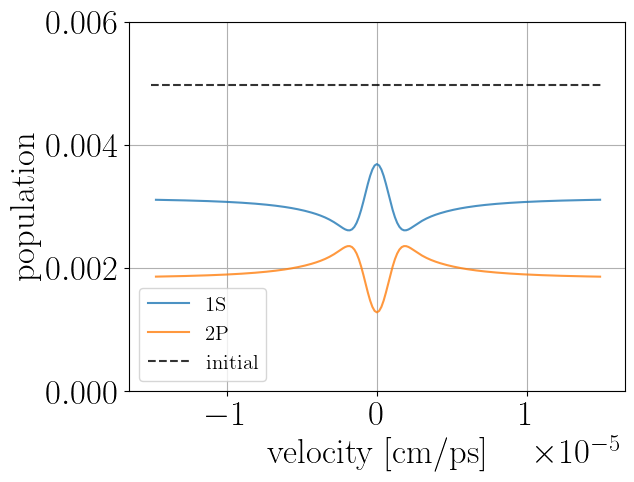

In [53]:
fig,ax = plt.subplots()
ax.plot(system.velocity_bins[2:-1],np.asarray(result.expect)[2:system.N_points-1,-1],alpha=0.8,label="1S")
ax.plot(system.velocity_bins[2:-1],np.asarray(result.expect)[system.N_points+2:system.N_points*2-1,-1],alpha=0.8,label="2P")
ax.plot(system.velocity_bins,np.asarray(result.expect)[system.N_points:system.N_points*2,0]+np.asarray(result.expect)[0:system.N_points,0],alpha=0.8,label="initial",ls="dashed",color="black")
plt.xlabel("velocity [cm/ps]")
plt.ylabel("population")
#plt.vlines(0,0,0.005,ls="dashed",color="black")
plt.grid()
plt.legend(fontsize=15)
plt.title("")
plt.ylim(0,0.006)
plt.savefig("figures/thesis_draft/SE_TF_LASER.svg",bbox_inches="tight")
plt.show()

# SE with chirped laser

In [54]:
system = Ps_system(N_atoms =1,N_points = 100)
rabi0 = 2*np.pi*(120e-3)
chirp = 2*np.pi*(40e-3)
detuning = 0#2*np.pi*(250e-3)
direction = 1
pulse_duration = 10
system.flag_SE_simple = True

laser_guess = {"label":"laser",
               "order":0,
               "scale":1000,
               "rabi0" : rabi0,
                "detuning0": detuning,
                "chirp" : chirp,
                "pulse_duration" : pulse_duration,
                "unit_wavevector":direction,
                "start":0,
                "end":int(3*pulse_duration)}

#system.init_distribution_singular()
system.init_distribution_flattop()
#system.init_MBdistribution()
system.init_states_excited()

laser = laser_new(laser_guess)
system.create_composite()
system.set_Hamiltonian_noCMT_general_laser(laser)
result = qt.mesolve(system.H,tlist=laser.tlist,rho0 = system.states,e_ops = system.e_ops,c_ops=system.c_ops,progress_bar=True)

10.8%. Run time:   2.07s. Est. time left: 00:00:00:17
21.6%. Run time:   3.83s. Est. time left: 00:00:00:13
32.4%. Run time:   5.83s. Est. time left: 00:00:00:12
40.5%. Run time:   8.24s. Est. time left: 00:00:00:12
51.4%. Run time:  11.58s. Est. time left: 00:00:00:10
62.2%. Run time:  14.61s. Est. time left: 00:00:00:08
70.3%. Run time:  17.03s. Est. time left: 00:00:00:07
81.1%. Run time:  19.95s. Est. time left: 00:00:00:04
91.9%. Run time:  23.04s. Est. time left: 00:00:00:02
Total run time:  24.61s


In [56]:
fig,ax = plt.subplots()
ax.plot(system.velocity_bins[2:-1],np.asarray(result.expect)[2:system.N_points-1,-1],alpha=0.8,label="1S")
ax.plot(system.velocity_bins[2:-1],np.asarray(result.expect)[system.N_points+2:system.N_points*2-1,-1],alpha=0.8,label="2P")
ax.plot(system.velocity_bins,np.asarray(result.expect)[system.N_points:system.N_points*2,0]+np.asarray(result.expect)[0:system.N_points,0],alpha=0.8,label="initial",ls="dashed",color="black")
plt.xlabel("velocity [cm/ps]")
plt.ylabel("population")
#plt.vlines(0,0,0.005,ls="dashed",color="black")
plt.grid()
plt.legend(fontsize=15)
#plt.title("")
plt.ylim(0,0.006)
#plt.savefig("figures/thesis_draft/SE_CHIRPED_LASER.svg",bbox_inches="tight")
plt.show()

# Study spontaneous emission with a cw-laser

10.0%. Run time:   0.00s. Est. time left: 00:00:00:00
20.0%. Run time:   0.00s. Est. time left: 00:00:00:00
30.0%. Run time:   0.00s. Est. time left: 00:00:00:00
40.0%. Run time:   0.01s. Est. time left: 00:00:00:00
50.0%. Run time:   0.01s. Est. time left: 00:00:00:00
60.0%. Run time:   0.01s. Est. time left: 00:00:00:00
70.0%. Run time:   0.01s. Est. time left: 00:00:00:00
80.0%. Run time:   0.01s. Est. time left: 00:00:00:00
90.0%. Run time:   0.01s. Est. time left: 00:00:00:00
Total run time:   0.01s
0.5347525270436091


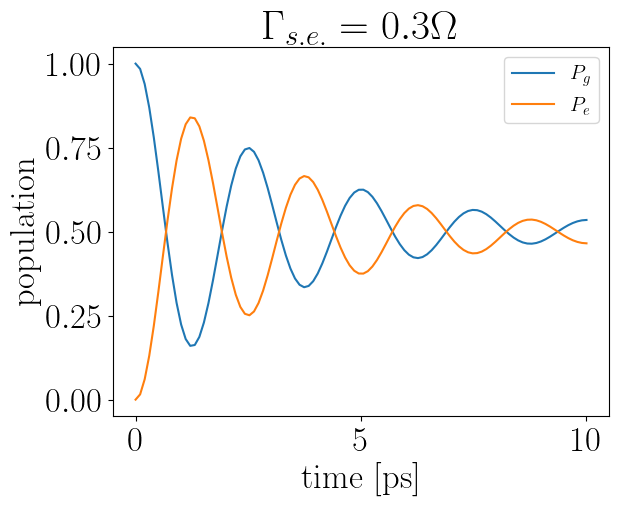

In [42]:
endTime = 10
rabi_frequency = 2*np.pi*(200e-3) # cw laser
N = 100

tlist = np.linspace(0,endTime,N)
H = []
H.append(qt.sigmax()*rabi_frequency)

kets = [qt.basis(2,i) for i in range(2)]
e_ops = [qt.ket2dm(ket) for ket in kets]
rate = rabi_frequency*0.3
c_ops = np.sqrt(rate)*qt.projection(2,0,1)
result = qt.mesolve(H,tlist=tlist,rho0 = kets[0],e_ops = e_ops,c_ops = c_ops,progress_bar=True)

decay = lambda t: np.exp(-t*rate)
plt.plot(tlist,result.expect[0],label=r"$P_g$")
plt.plot(tlist,result.expect[1],label=r"$P_e$")
plt.xlabel("time [ps]")
plt.ylabel("population")
plt.legend(fontsize=15)
print(result.expect[0][-1])
plt.title(r"$\Gamma_{s.e.} = 0.3\Omega$")
plt.savefig("figures/thesis_draft/cw_laser_undercritical.svg")
plt.show()

It looks to me like the spontaneous emission doesn't just suppress the evolution, but it kills it completely. The populations evolve kind of like a damped harmonic oscillator would in time. Very weird! Perhaps spontaneous emission acts as some decoherence mechanism such that we the ground and excited states uncouple?

# Study the operator for distributive spontaneous emission

In [187]:
system = Ps_system(N_atoms = 1,N_points =100)
rabi0 = 0#2*np.pi*(240e-3)
chirp = 0#2*np.pi*(50e-3)
detuning = 0
direction = 1
pulse_duration = 10
system.flag_SE_distributive = True

laser_guess = {"scale":1000,"label":"laser","order":0,"rabi0" : rabi0, "detuning0": detuning,"chirp" : chirp,"pulse_duration" : pulse_duration,"unit_wavevector":direction,"start":0,"end":int(5*pulse_duration)}
laser = laser_new(laser_guess)
system.init_distribution_MB()
#system.init_distribution_singular()
#system.init_distribution_flattop()
#n=3
#system.initial_pop[system.N_points//2-n:system.N_points//2+1+n] = 1
#system.initial_pop[system.N_points//2] = 1
#system.initial_pop[system.N_points//2+1] = 0.5
#system.initial_pop[system.N_points//2-1] = 0.5
system.init_states_excited()
system.create_composite()

initial_state = system.states.unit()
system.set_Hamiltonian_MT_general_laser(laser)
opts = qt.Options(store_states=True)
#print(system.c_ops)
system
result = qt.mesolve(system.H,tlist=laser.tlist,rho0 = initial_state,e_ops = system.e_ops,c_ops=system.c_ops,options=opts,progress_bar=True)
#result = qt.sesolve(system.H,tlist=laser.tlist,psi0 = initial_state,e_ops = system.e_ops,progress_bar=True,options=opts)
#print(system.c_ops)

11.5%. Run time:   4.58s. Est. time left: 00:00:00:35
21.3%. Run time:   7.48s. Est. time left: 00:00:00:27
31.1%. Run time:  10.20s. Est. time left: 00:00:00:22
41.0%. Run time:  13.16s. Est. time left: 00:00:00:18
50.8%. Run time:  15.83s. Est. time left: 00:00:00:15
60.7%. Run time:  18.57s. Est. time left: 00:00:00:12
70.5%. Run time:  21.16s. Est. time left: 00:00:00:08
80.3%. Run time:  24.07s. Est. time left: 00:00:00:05
90.2%. Run time:  27.11s. Est. time left: 00:00:00:02
Total run time:  29.14s


In [193]:
final_states = np.asarray(result.expect)[:,-1]
plt.plot(system.velocity_bins,np.asarray(result.expect)[system.N_points:system.N_points*2,0],label=r"initial $P_e$",color="black",ls="dashed",linewidth=3)
plt.plot(system.velocity_bins,final_states[0:system.N_points],label=r"$P_g$")
plt.plot(system.velocity_bins[0:system.N_points],final_states[system.N_points:system.N_points*2],label=r"$P_e$")
#plt.plot(system.velocity_bins,final_states[250:500]+final_states[0:250],label=r"$P_e$")
#plt.title("test of distributive s.e. (ratios: 0.6,0.2,0.2)",fontsize=20)
plt.xlabel("velocity [cm/ps]")
plt.ylabel("population")
plt.grid()
#plt.ylim(0,0.006)
plt.legend(fontsize=15)
#plt.axhline(0.6,ls="dashed",color="gold")
#plt.axhline(0.2,ls="dashed",color="brown")
#plt.savefig("figures/thesis_draft/SE_distributive_MB.svg",bbox_inches="tight")
#print(np.sum(np.asarray(result.expect)[:,-1]))
plt.show()


In [163]:
handler = data_handler()
print("variance before: {:.4f}".format(handler.expect_standard_deviation(result.states[0],N_bins=system.N_points)**2))
print("variance after: {:.4f}".format(handler.expect_standard_deviation(result.states[-1],N_bins=system.N_points)**2))
print("difference in variance: {:.4f}".format(handler.expect_standard_deviation(result.states[-1],N_bins=system.N_points)**2-handler.expect_standard_deviation(result.states[0],N_bins=system.N_points)**2))
#print("mean: {}".format(handler.expect_mean(result.states[0],N_bins=system.N_points)))


variance before: 993.9168
variance after: 994.3176
difference in variance: 0.4007


# SE with CMT

In [81]:
system = Ps_system(N_atoms =1,N_points = 100)
rabi0 = 2*np.pi*(120e-3)
chirp = 0#2*np.pi*(20e-3)
detuning = 0#2*np.pi*(250e-3)
direction = 1
pulse_duration = 10
system.flag_SE_simple = True

laser_guess = {"label":"laser",
               "order":0,
               "scale":1000,
               "rabi0" : rabi0,
                "detuning0": detuning,
                "chirp" : chirp,
                "pulse_duration" : pulse_duration,
                "unit_wavevector":direction,
                "start":0,
                "end":int(3*pulse_duration)}

#system.init_distribution_singular()
system.init_distribution_flattop()
#system.init_MBdistribution()
system.init_states_excited()

laser = laser_new(laser_guess)
system.create_composite()
initial_states = system.states
system.set_Hamiltonian_noCMT_general_laser(laser)
noCMT_result = qt.mesolve(system.H,tlist=laser.tlist,rho0 = initial_states,e_ops = system.e_ops,c_ops=system.c_ops,progress_bar=True)
system.set_Hamiltonian_MT_general_laser(laser)
CMT_result = qt.mesolve(system.H,tlist=laser.tlist,rho0 = initial_states,e_ops = system.e_ops,c_ops=system.c_ops,progress_bar=True)

10.8%. Run time:   1.98s. Est. time left: 00:00:00:16
21.6%. Run time:   4.12s. Est. time left: 00:00:00:14
32.4%. Run time:   7.34s. Est. time left: 00:00:00:15
40.5%. Run time:   9.24s. Est. time left: 00:00:00:13
51.4%. Run time:  11.72s. Est. time left: 00:00:00:11
62.2%. Run time:  14.51s. Est. time left: 00:00:00:08
70.3%. Run time:  16.85s. Est. time left: 00:00:00:07
81.1%. Run time:  20.10s. Est. time left: 00:00:00:04
91.9%. Run time:  23.02s. Est. time left: 00:00:00:02
Total run time:  24.58s
10.8%. Run time:   3.57s. Est. time left: 00:00:00:29
21.6%. Run time:   6.77s. Est. time left: 00:00:00:24
32.4%. Run time:   9.70s. Est. time left: 00:00:00:20
40.5%. Run time:  12.08s. Est. time left: 00:00:00:17
51.4%. Run time:  15.22s. Est. time left: 00:00:00:14
62.2%. Run time:  18.41s. Est. time left: 00:00:00:11
70.3%. Run time:  20.85s. Est. time left: 00:00:00:08
81.1%. Run time:  24.44s. Est. time left: 00:00:00:05
91.9%. Run time:  28.03s. Est. time left: 00:00:00:02
Tota

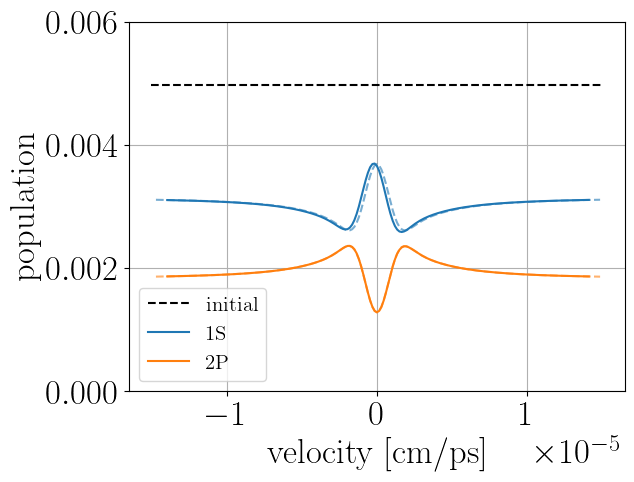

In [84]:
fig,ax = plt.subplots()
ax.plot(system.velocity_bins[2:-1],np.asarray(noCMT_result.expect)[2:system.N_points-1,-1],ls="dashed",alpha=0.6)
ax.plot(system.velocity_bins[2:-1],np.asarray(noCMT_result.expect)[system.N_points+2:system.N_points*2-1,-1],ls="dashed",alpha=0.6)
ax.plot(system.velocity_bins,np.asarray(noCMT_result.expect)[system.N_points:system.N_points*2,0]+np.asarray(noCMT_result.expect)[0:system.N_points,0],label="initial",ls="dashed",color="black")
plt.gca().set_prop_cycle(None)
ax.plot(system.velocity_bins[7:-6],np.asarray(CMT_result.expect)[7:system.N_points-6,-1],label="1S")
ax.plot(system.velocity_bins[7:-6],np.asarray(CMT_result.expect)[system.N_points+7:system.N_points*2-6,-1],label="2P")

plt.xlabel("velocity [cm/ps]")
plt.ylabel("population")
#plt.vlines(0,0,0.005,ls="dashed",color="black")
plt.grid()
plt.legend(fontsize=15)
plt.ylim(0,0.006)
plt.savefig("figures/thesis_draft/SE_CMT_TF.svg",bbox_inches="tight")
plt.show()

In [88]:
system = Ps_system(N_atoms =1,N_points = 100)
rabi0 = 2*np.pi*(120e-3)
chirp = 2*np.pi*(40e-3)
detuning = 0#2*np.pi*(250e-3)
direction = 1
pulse_duration = 10
system.flag_SE_simple = True

laser_guess = {"label":"laser",
               "order":0,
               "scale":1000,
               "rabi0" : rabi0,
                "detuning0": detuning,
                "chirp" : chirp,
                "pulse_duration" : pulse_duration,
                "unit_wavevector":direction,
                "start":0,
                "end":int(3*pulse_duration)}

#system.init_distribution_singular()
system.init_distribution_flattop()
#system.init_MBdistribution()
system.init_states_excited()

laser = laser_new(laser_guess)
system.create_composite()
initial_states = system.states
system.set_Hamiltonian_noCMT_general_laser(laser)
noCMT_result = qt.mesolve(system.H,tlist=laser.tlist,rho0 = initial_states,e_ops = system.e_ops,c_ops=system.c_ops,progress_bar=True)
system.set_Hamiltonian_MT_general_laser(laser)
CMT_result = qt.mesolve(system.H,tlist=laser.tlist,rho0 = initial_states,e_ops = system.e_ops,c_ops=system.c_ops,progress_bar=True)

10.8%. Run time:   2.47s. Est. time left: 00:00:00:20
21.6%. Run time:   4.35s. Est. time left: 00:00:00:15
32.4%. Run time:   5.96s. Est. time left: 00:00:00:12
40.5%. Run time:   8.00s. Est. time left: 00:00:00:11
51.4%. Run time:  12.05s. Est. time left: 00:00:00:11
62.2%. Run time:  15.46s. Est. time left: 00:00:00:09
70.3%. Run time:  17.85s. Est. time left: 00:00:00:07
81.1%. Run time:  20.53s. Est. time left: 00:00:00:04
91.9%. Run time:  23.28s. Est. time left: 00:00:00:02
Total run time:  24.87s
10.8%. Run time:   2.89s. Est. time left: 00:00:00:23
21.6%. Run time:   6.13s. Est. time left: 00:00:00:22
32.4%. Run time:   8.56s. Est. time left: 00:00:00:17
40.5%. Run time:  11.04s. Est. time left: 00:00:00:16
51.4%. Run time:  14.54s. Est. time left: 00:00:00:13
62.2%. Run time:  17.15s. Est. time left: 00:00:00:10
70.3%. Run time:  19.91s. Est. time left: 00:00:00:08
81.1%. Run time:  22.12s. Est. time left: 00:00:00:05
91.9%. Run time:  24.89s. Est. time left: 00:00:00:02
Tota

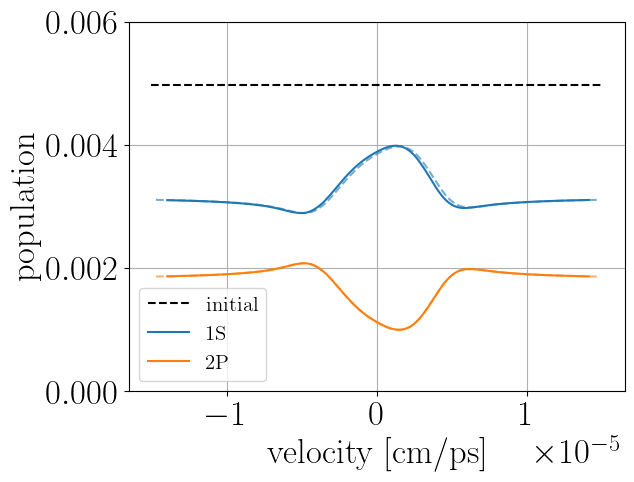

In [87]:
fig,ax = plt.subplots()
ax.plot(system.velocity_bins[2:-1],np.asarray(noCMT_result.expect)[2:system.N_points-1,-1],ls="dashed",alpha=0.6)
ax.plot(system.velocity_bins[2:-1],np.asarray(noCMT_result.expect)[system.N_points+2:system.N_points*2-1,-1],ls="dashed",alpha=0.6)
ax.plot(system.velocity_bins,np.asarray(noCMT_result.expect)[system.N_points:system.N_points*2,0]+np.asarray(noCMT_result.expect)[0:system.N_points,0],label="initial",ls="dashed",color="black")
plt.gca().set_prop_cycle(None)
ax.plot(system.velocity_bins[7:-6],np.asarray(CMT_result.expect)[7:system.N_points-6,-1],label="1S")
ax.plot(system.velocity_bins[7:-6],np.asarray(CMT_result.expect)[system.N_points+7:system.N_points*2-6,-1],label="2P")

plt.xlabel("velocity [cm/ps]")
plt.ylabel("population")
#plt.vlines(0,0,0.005,ls="dashed",color="black")
plt.grid()
plt.legend(fontsize=15)
plt.ylim(0,0.006)
#plt.savefig("figures/thesis_draft/SE_CMT_CHIRPED.svg",bbox_inches="tight")
plt.show()

# Making SE much stronger

In [118]:
system = Ps_system(N_atoms =1,N_points = 100)
rabi0 = 2*np.pi*(120e-3)
chirp = 2*np.pi*(40e-3)
detuning = 0#2*np.pi*(250e-3)
direction = 1
pulse_duration = 10
system.flag_SE_simple = True

laser_guess = {"label":"laser",
               "order":0,
               "scale":1000,
               "rabi0" : rabi0,
                "detuning0": detuning,
                "chirp" : chirp,
                "pulse_duration" : pulse_duration,
                "unit_wavevector":direction,
                "start":0,
                "end":int(3*pulse_duration)}

#system.init_distribution_singular()
system.init_distribution_flattop()
#system.init_MBdistribution()
system.init_states_ground()

laser = laser_new(laser_guess)
system.create_composite()
initial_states = system.states
system.set_Hamiltonian_MT_general_laser(laser)
result = qt.mesolve(system.H,tlist=laser.tlist,rho0 = initial_states,e_ops = system.e_ops,c_ops=system.c_ops,progress_bar=True)

10.8%. Run time:   0.93s. Est. time left: 00:00:00:07
21.6%. Run time:   2.18s. Est. time left: 00:00:00:07
32.4%. Run time:   3.23s. Est. time left: 00:00:00:06
40.5%. Run time:   3.99s. Est. time left: 00:00:00:05
51.4%. Run time:   4.78s. Est. time left: 00:00:00:04
62.2%. Run time:   6.36s. Est. time left: 00:00:00:03
70.3%. Run time:   7.37s. Est. time left: 00:00:00:03
81.1%. Run time:   8.77s. Est. time left: 00:00:00:02
91.9%. Run time:  10.28s. Est. time left: 00:00:00:00
Total run time:  11.01s


In [119]:
system = Ps_system(N_atoms =1,N_points = 100)
rabi0 = 2*np.pi*(120e-3)
chirp = 2*np.pi*(40e-3)
detuning = 0#2*np.pi*(250e-3)
direction = 1
pulse_duration = 10
system.flag_SE_simple = False

laser_guess = {"label":"laser",
               "order":0,
               "scale":1000,
               "rabi0" : rabi0,
                "detuning0": detuning,
                "chirp" : chirp,
                "pulse_duration" : pulse_duration,
                "unit_wavevector":direction,
                "start":0,
                "end":int(3*pulse_duration)}

#system.init_distribution_singular()
system.init_distribution_flattop()
#system.init_MBdistribution()
system.init_states_ground()

laser = laser_new(laser_guess)
system.create_composite()
initial_states = system.states
system.set_Hamiltonian_noCMT_general_laser(laser)
noSE_result = qt.mesolve(system.H,tlist=laser.tlist,rho0 = initial_states,e_ops = system.e_ops,c_ops=system.c_ops,progress_bar=True)

10.8%. Run time:   0.00s. Est. time left: 00:00:00:00
21.6%. Run time:   0.01s. Est. time left: 00:00:00:00
32.4%. Run time:   0.01s. Est. time left: 00:00:00:00
40.5%. Run time:   0.02s. Est. time left: 00:00:00:00
51.4%. Run time:   0.02s. Est. time left: 00:00:00:00
62.2%. Run time:   0.03s. Est. time left: 00:00:00:00
70.3%. Run time:   0.03s. Est. time left: 00:00:00:00
81.1%. Run time:   0.04s. Est. time left: 00:00:00:00
91.9%. Run time:   0.04s. Est. time left: 00:00:00:00
Total run time:   0.05s


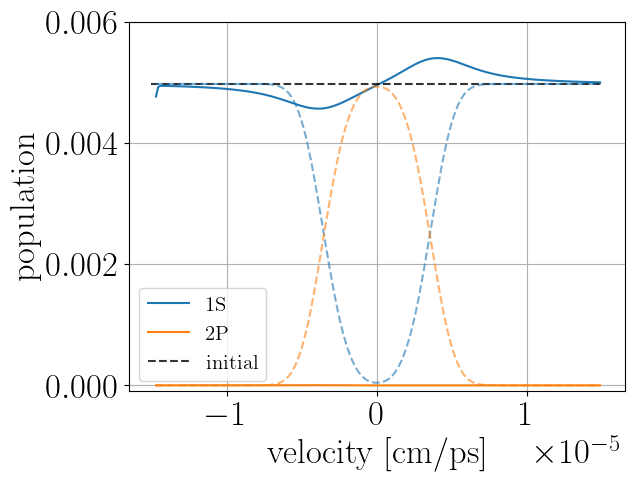

In [121]:
fig,ax = plt.subplots()
ax.plot(system.velocity_bins[2:-1],np.asarray(result.expect)[2:system.N_points-1,-1],label="1S")
ax.plot(system.velocity_bins[2:-1],np.asarray(result.expect)[system.N_points+2:system.N_points*2-1,-1],label="2P")
ax.plot(system.velocity_bins,np.asarray(result.expect)[system.N_points:system.N_points*2,0]+np.asarray(result.expect)[0:system.N_points,0],alpha=0.8,label="initial",ls="dashed",color="black")
plt.gca().set_prop_cycle(None)
ax.plot(system.velocity_bins[2:-1],np.asarray(noSE_result.expect)[2:system.N_points-1,-1],ls="dashed",alpha=0.6)
ax.plot(system.velocity_bins[2:-1],np.asarray(noSE_result.expect)[system.N_points+2:system.N_points*2-1,-1],ls="dashed",alpha=0.6)

plt.xlabel("velocity [cm/ps]")
plt.ylabel("population")
#plt.vlines(0,0,0.005,ls="dashed",color="black")
plt.grid()
plt.legend(fontsize=15)
plt.title("")
plt.ylim(-0.0001,0.006)
plt.savefig("figures/thesis_draft/STRONG_SE.svg",bbox_inches="tight")
plt.show()